In [49]:
# IMPORTING LIBRARIES

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import sklearn


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [50]:
# IMPORTUING DATA SETS AND READING CSV FILES

df = pd.read_csv("water_potability.csv")
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [51]:
# COLUMNS IN DATASET
df.columns()

TypeError: 'Index' object is not callable

In [52]:
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [53]:
# FINDING DATA TYPES
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [54]:
# FINDING NULL VALUES
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

<AxesSubplot:>

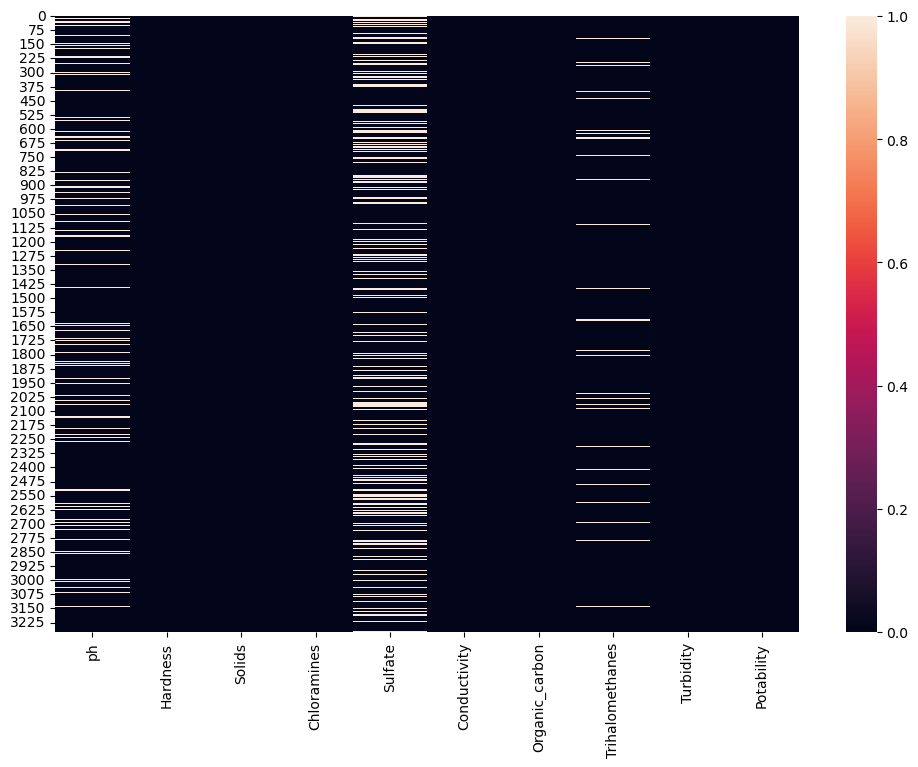

In [55]:
plt.figure(figsize =(12,8))
sns.heatmap(df.isnull())

<AxesSubplot:>

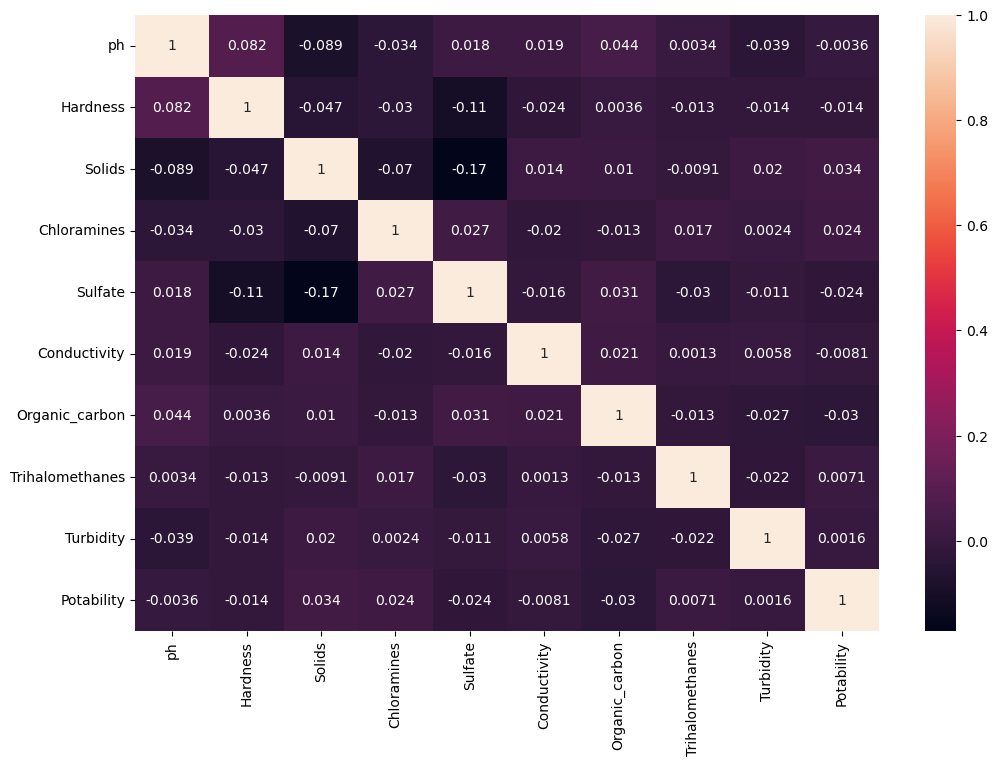

In [56]:
# VISUALIZE HEAT MAP

plt.figure(figsize =(12,8))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Potability', ylabel='count'>

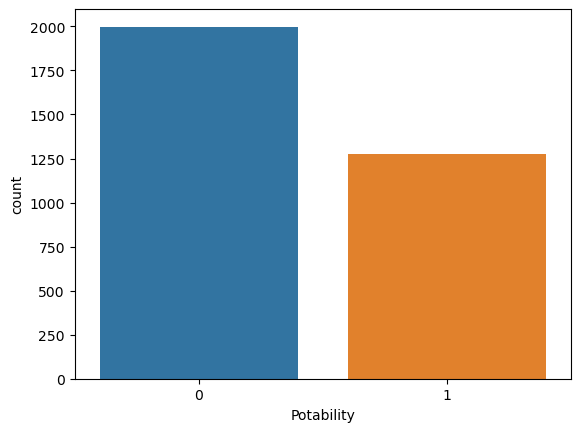

In [57]:
# COUNT PLOT
sns.countplot(x="Potability",data=df)

In [58]:
# VALUE COUNT
df["Potability"].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

# VISUALIZING DATA SET

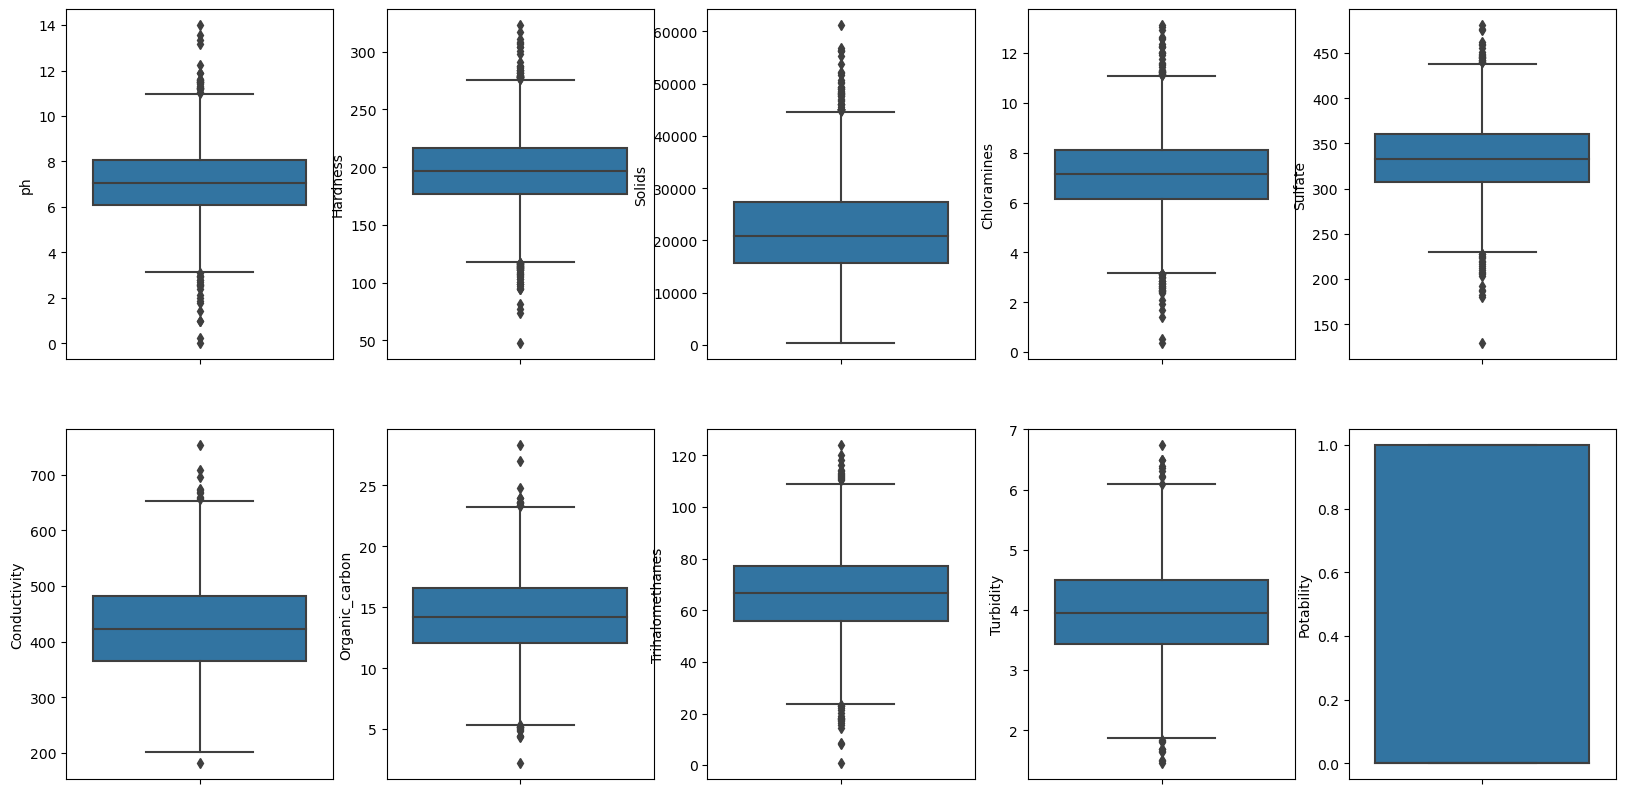

In [59]:
# VISUALISING DATASET AND CHECKING FOR OUTLIERS
fig,ax = plt.subplots(ncols=5 , nrows=2, figsize =(20,10))
ax = ax.flatten()
index = 0
for col,values in df.items():
    sns.boxplot(y=col,data=df,ax=ax[index])
    index +=1


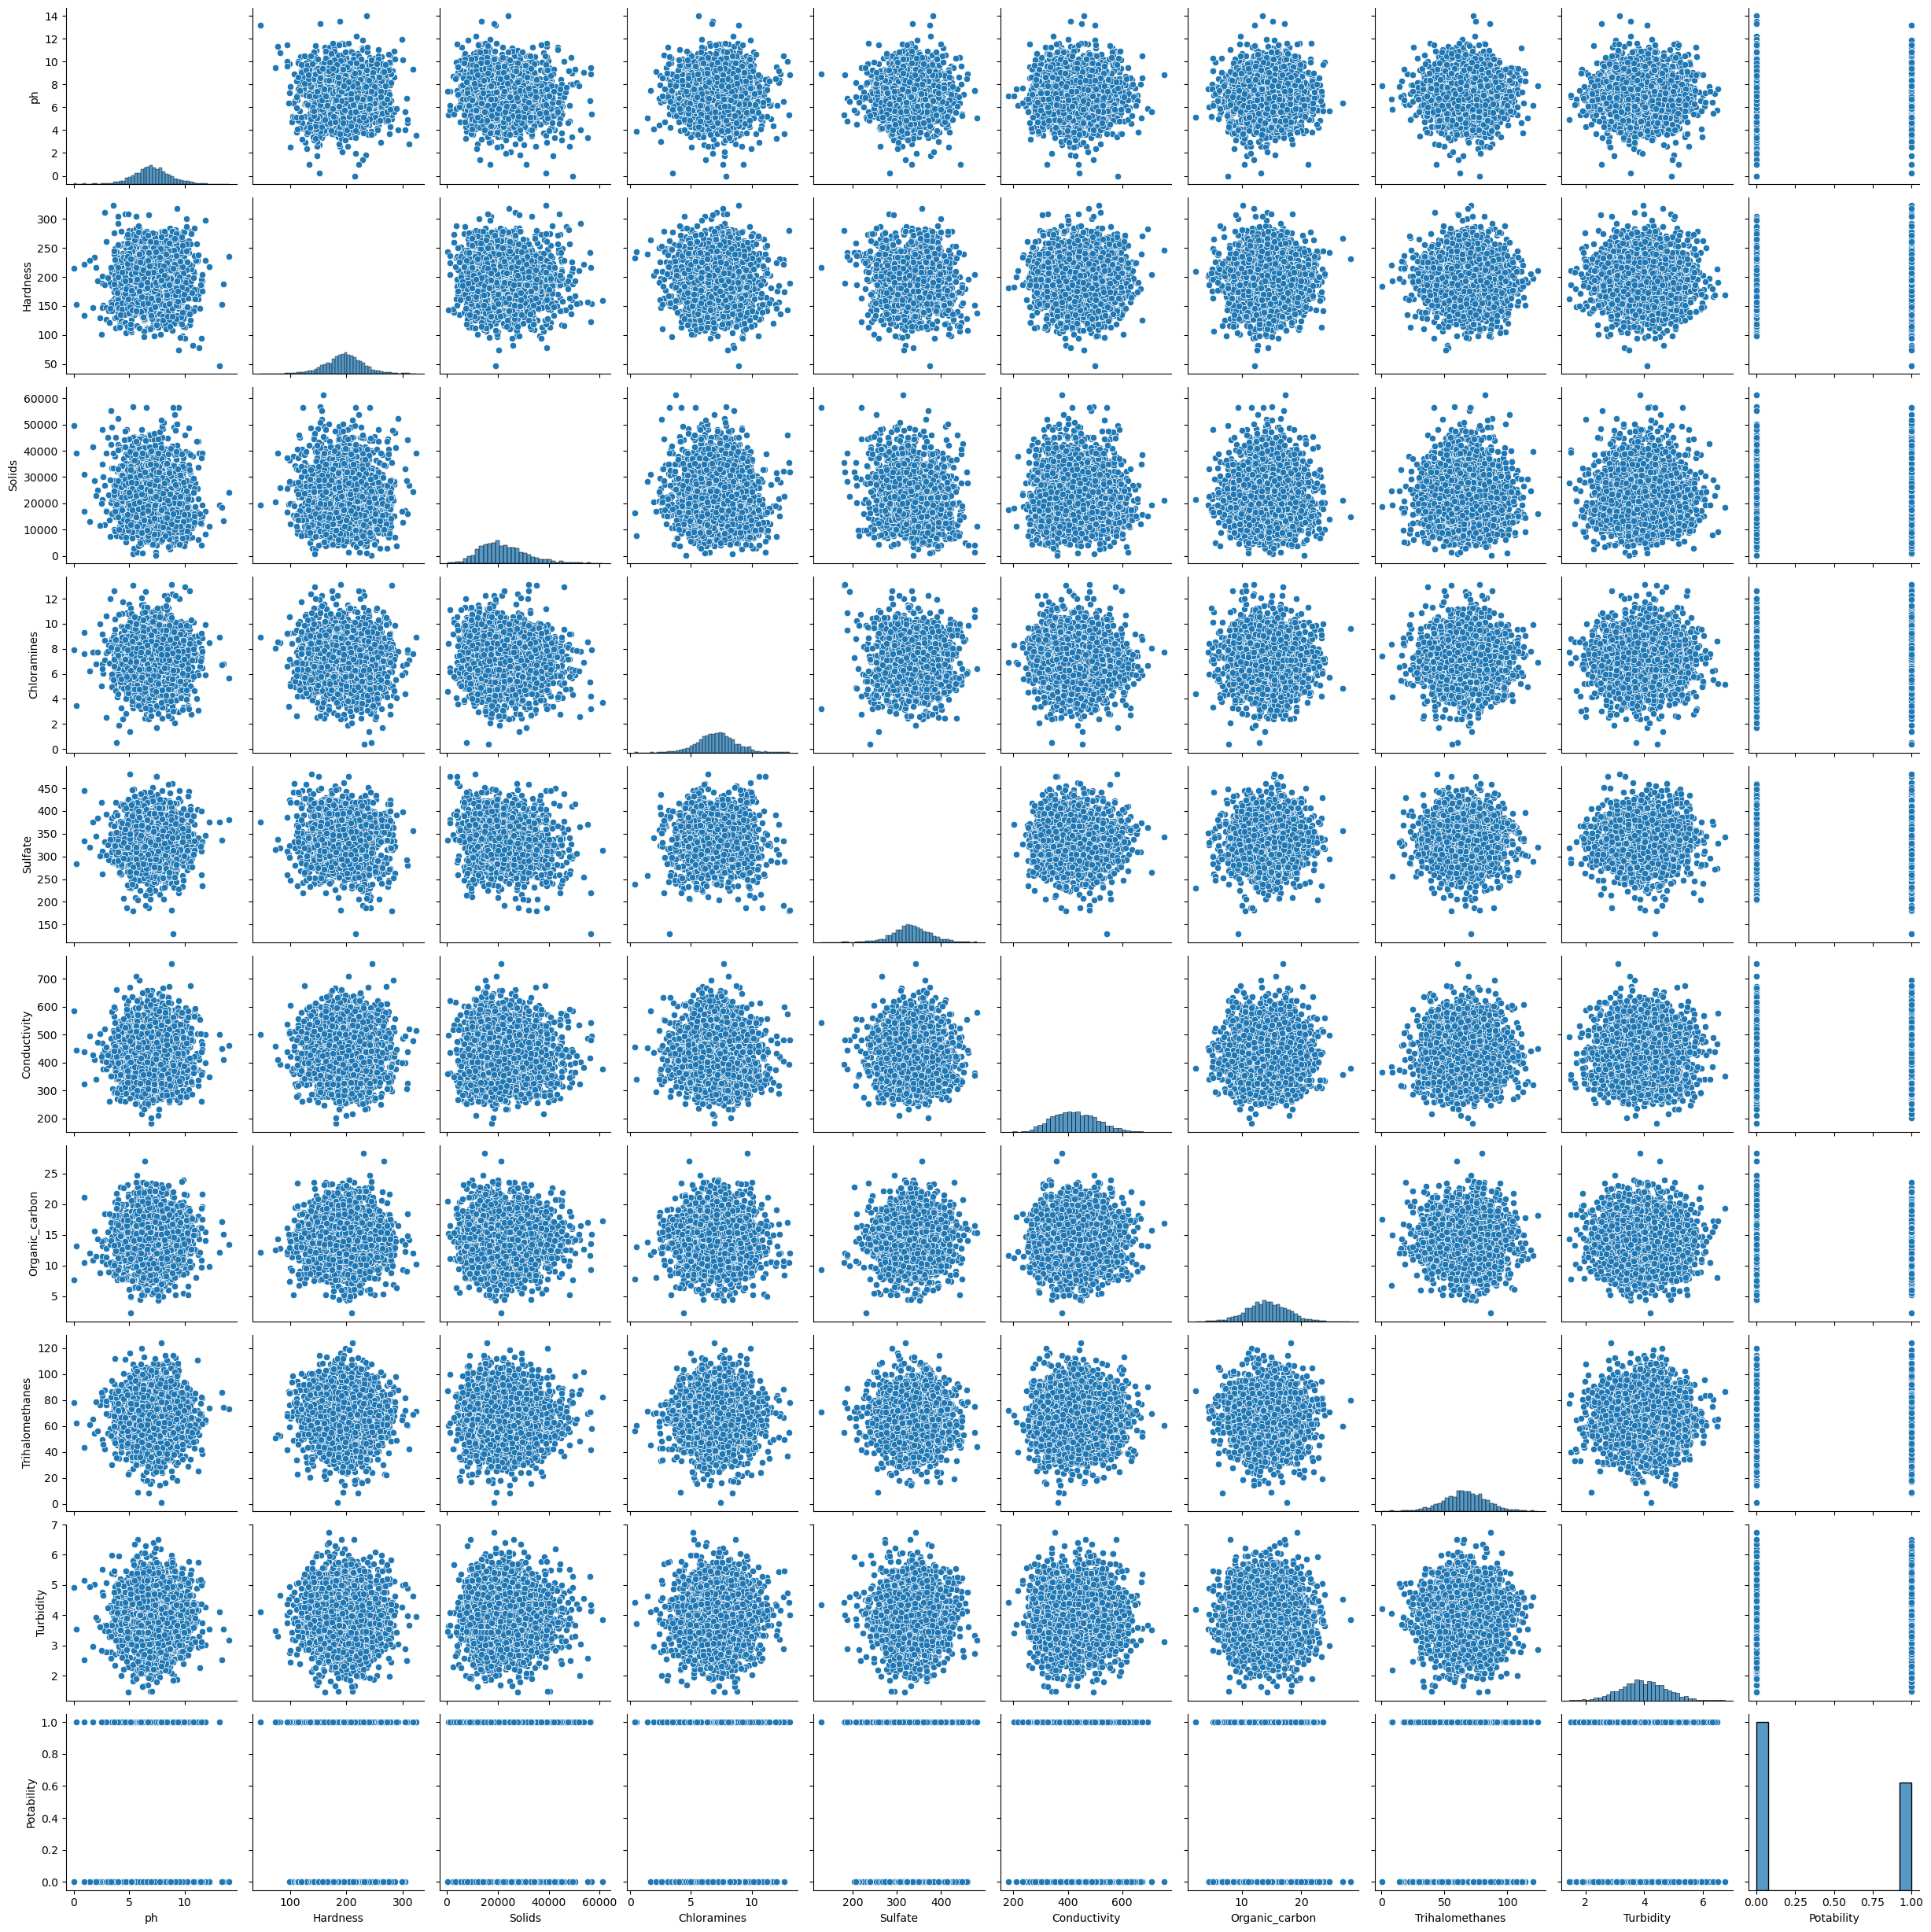

In [60]:
# PAIR PLOT
sns.pairplot(df)

In [61]:
# PI CHART
fig = px.pie(df,names = "Potability",hole=0.4,template = "plotly_dark")
fig.show()

In [62]:
# SCATTER PLOTS
fig = px.scatter(df,x="ph",y="Sulfate",color = "Potability",template="plotly_dark")
fig.show()

In [63]:
# SCATTER PLOTS
fig = px.scatter(df,x="Organic_carbon",y="Hardness",color = "Potability",template="plotly_dark")
fig.show()

# NULL VALUES


Text(0, 0.5, 'Percentage of missing values')

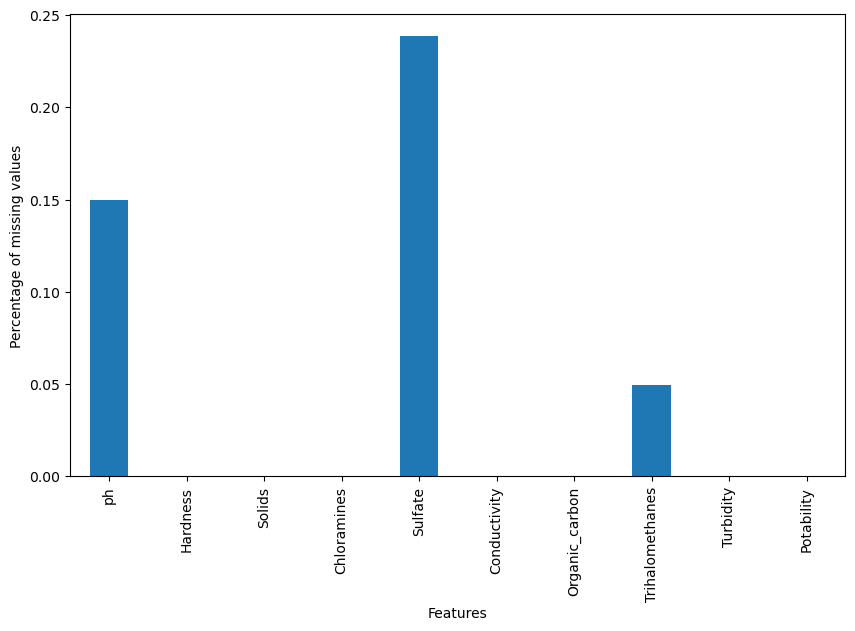

In [64]:
# NULL VALUES
df.isnull().mean().plot.bar(figsize = (10,6))
plt.xlabel("Features")
plt.ylabel("Percentage of missing values")

In [65]:
# FILLING NULL VALUES WITH MEAN
df["ph"] = df["ph"].fillna(df["ph"].mean())
df["Sulfate"] = df["Sulfate"].fillna(df["Sulfate"].mean())
df["Trihalomethanes"] = df["Trihalomethanes"].fillna(df["Trihalomethanes"].mean())


In [66]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

<AxesSubplot:>

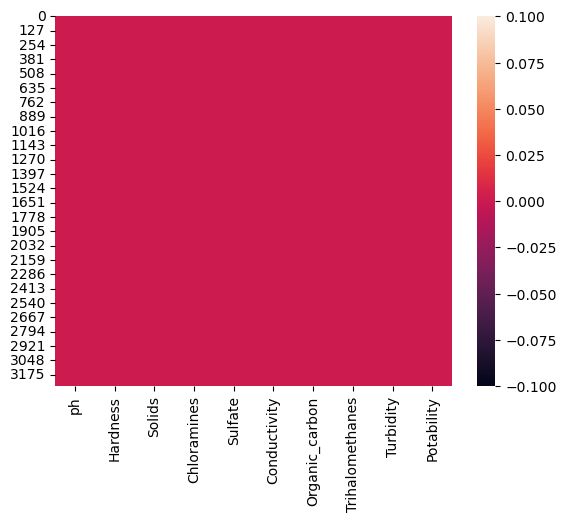

In [67]:
sns.heatmap(df.isnull())

In [68]:
x = df.drop("Potability",axis=1)
y = df["Potability"]

In [69]:
x.shape , y.shape

((3276, 9), (3276,))

In [70]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[-1.02733269e-14,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  1.50940884e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797383e-01],
       [ 5.40150905e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.80223466e-01, -2.12445866e+00]])

In [71]:
# SPLITING DATA
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [72]:
x_train.shape ,x_test.shape

((2620, 9), (656, 9))

# LOGISTIC REGRESSION

In [73]:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression

In [74]:
# OBJECT OF LR
model_lr = LogisticRegression()

In [75]:
# TRAINING MODEL
model_lr.fit(x_train, y_train)

LogisticRegression()

In [76]:
# MAKING PREDICTION
pred_lr = model_lr.predict(x_test)

In [77]:
# ACCURACY SCORE
accuracy_score_lr = accuracy_score(y_test, pred_lr)
accuracy_score_lr*100

60.213414634146346

# DECISION TREE


In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
# CREATING THE OBJECT MODEL
model_dt = DecisionTreeClassifier(max_depth = 4)

In [80]:
# TRAINING OF DECISION TREE
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [81]:
# MAKING A PREDICTION OF DECISION TREE
pred_dt = model_dt.predict(x_test)

In [82]:
accuracy_score_dt = accuracy_score(y_test, pred_dt)
accuracy_score_dt*100

64.17682926829268

In [83]:
# CONFUSION MATRIX
cm2 = confusion_matrix(y_test, pred_dt)
cm2

array([[355,  40],
       [195,  66]], dtype=int64)

# RANDOM FOREST CLASSSIFIERS

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
model_rf = RandomForestClassifier()

In [86]:
# TRAINING MODEL RF
model_rf.fit(x_train, y_train)

RandomForestClassifier()

In [87]:
# MAKING PREDICTION
pred_rf = model_rf.predict(x_test)

In [88]:
accuracy_score_rf = accuracy_score(y_test, pred_rf)
accuracy_score_rf*100

69.51219512195121

In [89]:
# CONFUSION MATRIX
cm3 = confusion_matrix(y_test, pred_rf)
cm3

array([[354,  41],
       [159, 102]], dtype=int64)

# kNN - NEAREST NEIGHBOURS


In [90]:
from sklearn.neighbors import KNeighborsClassifier

In [91]:
# CREATING MODEL OBJECT
model_knn = KNeighborsClassifier()

In [92]:
for i in range(4,15):
    model_knn = KNeighborsClassifier(n_neighbors=i)
    model_knn.fit(x_train, y_train)
    pred_knn = model_knn.predict(x_test)
    accuracy_score_knn = accuracy_score(y_test, pred_knn)
    print(i, accuracy_score_knn)

C:\Users\SHASHI\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\Users\SHASHI\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



4 0.6570121951219512
5 0.6585365853658537
6 0.6646341463414634
7 0.663109756097561


C:\Users\SHASHI\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\Users\SHASHI\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



8 0.6615853658536586
9 0.6600609756097561
10 0.6646341463414634
11 0.6661585365853658
12 0.6615853658536586
13 0.6707317073170732
14 0.6554878048780488


C:\Users\SHASHI\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\Users\SHASHI\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



In [93]:
model_knn = KNeighborsClassifier(n_neighbors=10)
model_knn.fit(x_train, y_train)
pred_knn = model_knn.predict(x_test)
accuracy_score_knn = accuracy_score(y_test, pred_knn)
print(i, accuracy_score_knn*100)

C:\Users\SHASHI\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



14 66.46341463414635


In [94]:
# CONFUSION MATRIX
cm4 = confusion_matrix(y_test, pred_knn)
cm4

array([[360,  35],
       [185,  76]], dtype=int64)

# SVM - SUPPORT VECTOR MACHINE

In [95]:
import sklearn

In [96]:
from sklearn.svm import SVC, LinearSVC

In [97]:
#CREATING OBJECT MODEL
model_svm = SVC(kernel="rbf")

In [98]:
# MODEL TRAINING
model_svm.fit(x_train, y_train)

SVC()

In [99]:
# MAKING PREDICTIONS
pred_svm = model_svm.predict(x_test)

In [100]:
# ACCURACY SCORE
accuracy_score_svm = accuracy_score(y_test, pred_svm)
accuracy_score_svm*100

68.90243902439023

In [101]:
# CONFUSION MATRIX
cm5 = confusion_matrix(y_test, pred_svm)
cm5

array([[368,  27],
       [177,  84]], dtype=int64)

# AdaBoost CLASSIFIER


In [102]:
from sklearn.ensemble import AdaBoostClassifier

In [103]:
# MAKING OBJECT MODEL
model_ada = AdaBoostClassifier(learning_rate=0.002, n_estimators= 205)

In [104]:
# TRAINING TJHE MODEL
model_ada.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=0.002, n_estimators=205)

In [105]:
# MAKING PREDICTION
pred_ada = model_ada.predict(x_test)

In [106]:
# ACCURACY SCORE
accuracy_score_ada = accuracy_score(y_test, pred_ada)
accuracy_score_ada*100

60.82317073170732

In [107]:
# CONFUSION MATRIX
cm6 = confusion_matrix(y_test, pred_ada)
cm6

array([[388,   7],
       [250,  11]], dtype=int64)

# Using XG BOOST CLASSIFIER

In [108]:
from xgboost import XGBClassifier

In [109]:
# CREATING OBJECT MODEL
model_xgb = XGBClassifier(n_estimators= 200, learning_rate= 0.03)

In [110]:
# TRAINING MODEL
model_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [111]:
# PREDICTING MODEL
pred_xgb = model_xgb.predict(x_test)

In [112]:
# ACCURACY SCORE
accuracy_score_xgb = accuracy_score(y_test, pred_xgb)
accuracy_score_xgb*100

67.6829268292683

In [113]:
# CONFUSION MATRIX
cm7 = confusion_matrix(y_test, pred_xgb)
cm7

array([[349,  46],
       [166,  95]], dtype=int64)

# ACCURACY VISUALIZATION

In [114]:
models = pd.DataFrame({
    'Model':['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'KNeighbours', 'SVM', 'AdaBoost'],
    'Accuracy Score' :[accuracy_score_lr, accuracy_score_dt, accuracy_score_rf, accuracy_score_xgb, accuracy_score_knn, accuracy_score_svm, accuracy_score_ada]
})

In [115]:
models

Model  Accuracy Score
0  Logistic Regression        0.602134
1        Decision Tree        0.641768
2        Random Forest        0.695122
3              XGBoost        0.676829
4          KNeighbours        0.664634
5                  SVM        0.689024
6             AdaBoost        0.608232

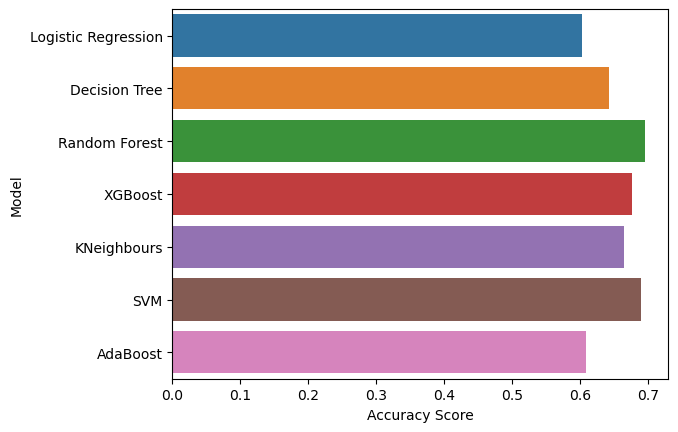

In [116]:
# PLOTS
sns.barplot(x='Accuracy Score', y='Model', data=models)
models.sort_values(by='Accuracy Score', ascending = False)
plt.show()

# Conclusion :- Here SVM classifier has achieved highest accuracy
